<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [135]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [181]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [182]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [183]:
#First glance at data
boston_df.head(20)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [184]:
#Task 2: Generate Descriptive Statistics and Visualizations
#Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot
#Variable: MEDV - Median value of owner-occupied homes in $1000's

#Summary statistics of MEDV
print(boston_df['MEDV'].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


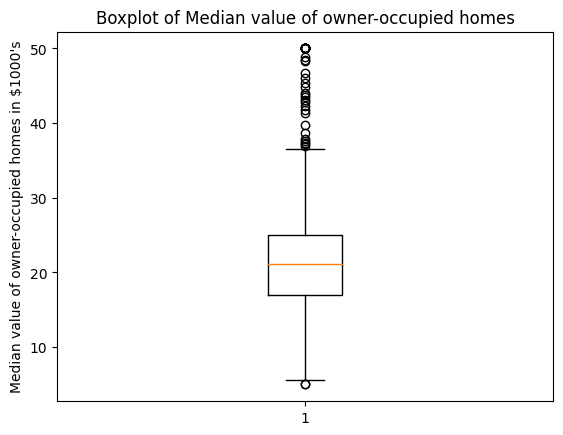

In [185]:
#Printing a boxplot
pyplot.boxplot(boston_df['MEDV'])
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.title("Boxplot of Median value of owner-occupied homes")
pyplot.show()

In [ ]:
#Conclusions
#-This boxplot describes the distribution of the median value of owner-occupied homes per town in the sample.   
#-The median of all median values of owner-occupied homes corresponds to approx. 21'000 USD, i.e. 50% of the observed median values have a lower value than 21 USDk, whereas another 50% havea a higher value than 21 USDk.
#-Across all towns in the sample the 1st quartile is equal to approx. 17'000 USD, meaning 25% of the observations have a lower median value than 17 USDk, whereas 75% of the observations have a higher median value than 17 USDk.
#-Across all towns in the sample the 3rd quartile is equal to approx. 25'000 USD, meaning 75% of the observations have a lower median value than 25 USDk, whereas 25% of the observations have a higher median value than 25 USDk.
#-The Inter Quartile Range (IQR), i.e. the 50% of observations centerted around the median fall approx. between 17 USDk and 25 USDk, which provides an idea about the body of the distribution.  
#-The minimum median value of owner-occupied homes corresponds to approx. 5'000 USD which matches the end of the lower Whisker at 5 USDk [=17-IQR*1.5=17-(25-17)*1.5 USDk]. Thus, there is no outlier to the left of the distribution.  
#-The maximum median value of owner-occupied homes corresponds to approx. 50'000 USD, however the end of the upper Whisker is at 37 USDk [=25+IQR*1.5=25+(25-17)*1.5 USDk]. Thus, there is a large number of outliers making up a bigger tail to the right of the distribution.
#-Hence, the propability density function (pdf) of all median values representing owner-occupied homes takes on a positively-skewed form, which is further substantiated by the mean (see summary stats) being slightly bigger than the median.

CHAS  Otherwise  Tract bounds Charles River
CHAS                                       
0.0         471                           0
1.0           0                          35


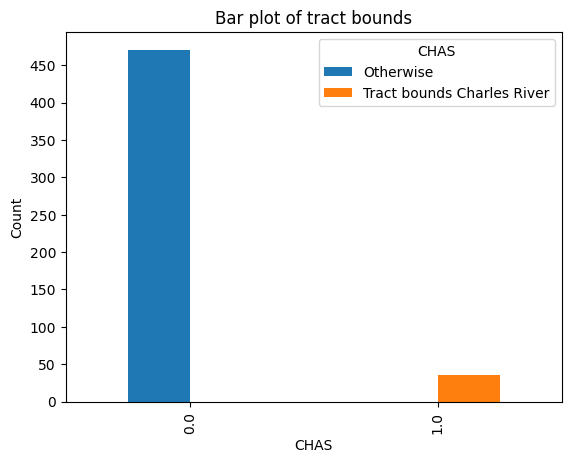

In [186]:
#Task 2: Generate Descriptive Statistics and Visualizations
#Task 2.2: Provide a  bar plot for the Charles river variable
#Variable: CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

plot_df = (pd.crosstab(boston_df['CHAS'], boston_df['CHAS']).rename(columns={0: 'Otherwise', 1: 'Tract bounds Charles River'}))
print(plot_df)
plot_df.plot.bar()
pyplot.ylabel("Count")
pyplot.title("Bar plot of tract bounds")
# Change y-axis tick spacing
pyplot.yticks(np.arange(0, 500, step=50))
pyplot.show()

In [ ]:
#Conclusion
#-The number on lots having tract bounds with Charles River account for 35 (6.91%). Thus, a total of 471 (93.08%) lots have tract bounds otherwise.  

In [187]:
#Task 2: Generate Descriptive Statistics and Visualizations
#Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#Variables: 
#MEDV - Median value of owner-occupied homes in $1000's
#AGE - proportion of owner-occupied units built prior to 1940

#Summary Stats of AGE
print(boston_df['AGE'].describe())

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [188]:
group_label = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AgeGroups'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=group_label)
boston_df[["MEDV","AGE","AgeGroups"]].head()

,MEDV,AGE,AgeGroups
0,24.0,65.2,between 35 and 70 years
1,21.6,78.9,70 years and older
2,34.7,61.1,between 35 and 70 years
3,33.4,45.8,between 35 and 70 years
4,36.2,54.2,between 35 and 70 years


In [190]:
boston_df.groupby("AgeGroups", observed=False)['MEDV'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroups,,,,,,,,
35 years and younger,91.0,27.775824,7.638198,17.1,23.050,24.8,31.150,50.0
between 35 and 70 years,128.0,24.947656,6.969370,10.2,20.675,22.6,27.425,50.0
70 years and older,287.0,19.793380,9.515375,5.0,13.800,18.2,22.550,50.0


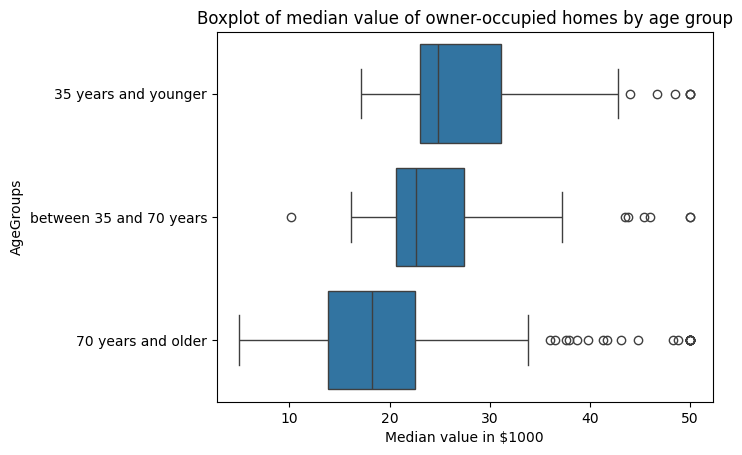

In [193]:
#Printing a boxplot per category
sns.boxplot(x=boston_df['MEDV'], y=boston_df["AgeGroups"])
pyplot.xlabel("Median value in $1000")
pyplot.title("Boxplot of median value of owner-occupied homes by age group")
pyplot.show()

In [ ]:
#Conclusions
#-The older the age group the lower the 1st quartile, median, 3rd quartile of the median value of owner-occupied homes which matches intuition. In other words, older homes have a lower median value (and avg value, see summary stats) than more newly built homes.
#-However, looking at 70 years and older category there is a huge number of outliers with values up until 50'000 USD. Note that the corresponding number of outliers for the 2 remaining categories is much lower. 
#-As an assumption, the houses in the 70 years and older category could be located in attractive areas, meaning the value of the lot may overcompensate for the lower value of house itself, given its higher age.  
#-IQR is widest for houses in the 70 years and older category: IQR = 8.75 USDk [vs 6.75 USDk (35<x<70) and 8.1 USDk (x<=35)] pointing towards a higher spread (=std) of median values, which is further substantiated by the higher number of outliers in the right tail.

In [106]:
#Task 2: Generate Descriptive Statistics and Visualizations
#Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
#Variables: 
#NOX - nitric oxides concentration (parts per 10 million)
#INDUS - proportion of non-retail business acres per town.

#Summary statistics of 'NOX' and 'INDUS'
print(boston_df[['NOX','INDUS']].describe())

              NOX       INDUS
count  506.000000  506.000000
mean     0.554695   11.136779
std      0.115878    6.860353
min      0.385000    0.460000
25%      0.449000    5.190000
50%      0.538000    9.690000
75%      0.624000   18.100000
max      0.871000   27.740000


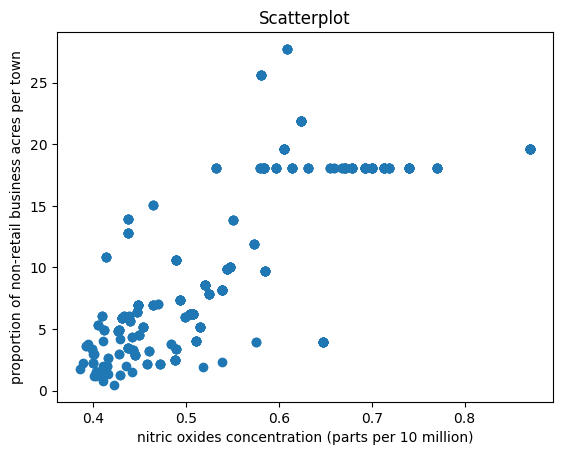

In [108]:
#Printing a scatterplot
pyplot.scatter(boston_df['NOX'],boston_df['INDUS'],)
pyplot.xlabel("nitric oxides concentration (parts per 10 million)")
pyplot.ylabel("proportion of non-retail business acres per town")
pyplot.title("Scatterplot")
pyplot.show()

In [ ]:
#Conclusions
#-The higher the nitric oxides concentration, the higher the proportion of non-retail business acres per town pointing to a positive relationship.
#-The scatter suggests a positive linar dependency between nitric oxides concentration and the proportion of non-retail business acres per town.
#-This linar dependency appears to be stronger for smaller values in nitric oxides concentrations and smaller proportions of non-retail business acres per town as the value pairs concentrate stronger around an imaginary upward sloping line.

In [104]:
#Task 2: Generate Descriptive Statistics and Visualizations
#Task 2.5: Create a histogram for the pupil to teacher ratio variable
#Variable: PTRATIO - pupil-teacher ratio by town

#Summary statistics of 'PTRATIO'
print(boston_df['PTRATIO'].describe())

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


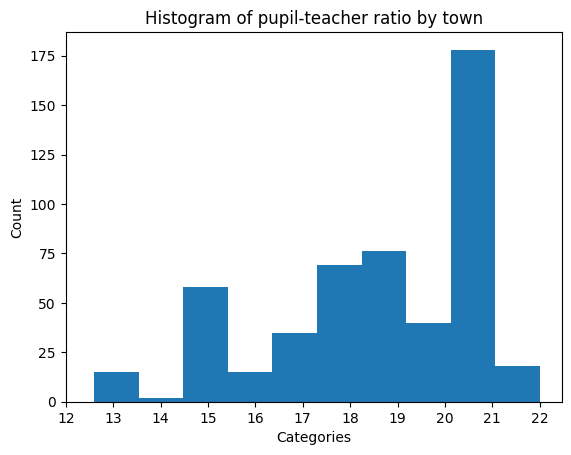

In [115]:
#Printing a histogram
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel("Categories")
pyplot.ylabel("Count")
pyplot.title("Histogram of pupil-teacher ratio by town")
# Change x-axis tick spacing
pyplot.xticks(np.arange(12, 23, step=1))
pyplot.show()

In [ ]:
#Conclusions
#-The histogram points to a negatively skewed distribution of the pupil-teacher ratio with mode in the 20-21 category.
#-Given the negatively skewed shape the mean is expected to be lower than the median and the mode.
#-The median is estimated at a pupil-teacher ratio of about 19 given the huge number (=180) of observations falling into the 20-21 category, 40 observations in the 19-20 cat, and 20 observations in the 21-22 cat.
#-Therefore, top 3 categories cover approx. 250 towns, which corresponds to approx. 50% of the sample. 
#-Thus, 50% out of the 506 towns have a pupil-teacher ratio that is lower than 19, another 50% have a higher PTRATIO than 19.
#-Note that in approx. 180 out of 506 towns, i.e in more than 1/3 of all towns, a single teacher cares for approx. 20-21 pupils.


In [209]:
#Task 3: Use the appropriate tests to answer the questions provided.

#Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Variables
#MEDV - Median value of owner-occupied homes in $1000's
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#1. Testing for equal variances:
#H0: The population variances of both samples are equal. 
scipy.stats.levene(boston_df[boston_df["CHAS"]==0][["MEDV"]], boston_df[boston_df["CHAS"]==1][["MEDV"]])

LeveneResult(statistic=array([4.59034222]), pvalue=array([0.03263098]))

In [ ]:
#Conclusion:
#The p-value is smaller than the significance level of 5%, thus the levene test statistic falls into the rejection area. H0, i.e. equal variances, is to be rejected at the significance level of 5%.
#There is a significant difference in the population variances.

In [214]:
#2. Testing for equal means:
#H0: The population means of both samples are equal. 
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==0][["MEDV"]], boston_df[boston_df["CHAS"]==1][["MEDV"]], equal_var=False)

TtestResult(statistic=array([-3.11329131]), pvalue=array([0.00356717]), df=array([36.8764088]))

In [ ]:
#Conclusion:
#The p-value is smaller than the significance level of 5%, thus the t-test statistic falls into the rejection area. H0, i.e. equal means, is to be rejected at the significance level of 5%.
#There is a significant difference in median value of houses bounded by the Charles river as compared to houses that are not bounded by the Charles river.

In [ ]:
#Task 3: Use the appropriate tests to answer the questions provided.

#Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Variables
#MEDV - Median value of owner-occupied homes in $1000's
#AGE - proportion of owner-occupied units built prior to 1940

In [215]:
#Leveraging discretized AGE groups as per Task 2.3
boston_df.groupby("AgeGroups", observed=False)['MEDV'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroups,,,,,,,,
35 years and younger,91.0,27.775824,7.638198,17.1,23.050,24.8,31.150,50.0
between 35 and 70 years,128.0,24.947656,6.969370,10.2,20.675,22.6,27.425,50.0
70 years and older,287.0,19.793380,9.515375,5.0,13.800,18.2,22.550,50.0


In [ ]:
#H0: The population means of all 3 age groups are equal. Hence, there no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

In [212]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df["AgeGroups"]=="35 years and younger"][["MEDV"]],boston_df[boston_df["AgeGroups"]=="between 35 and 70 years"][["MEDV"]],boston_df[boston_df["AgeGroups"]=="70 years and older"][["MEDV"]])

In [213]:
print("F-Statistic: {0}, p-value {1}".format(f_statistic,p_value))

F-Statistic: [36.40764999], p-value [1.7105011e-15]


In [ ]:
#Conclusion:
#The p-value is smaller than the significance level of 5%, thus the f statistic falls into the rejection area. H0, i.e. equal means, is to be rejected at the significance level of 5%.
#There is a significant difference in median value of owner occupied homes across the 3 different age groups.

In [ ]:
#Task 3: Use the appropriate tests to answer the questions provided.

#Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Variables
#NOX - nitric oxides concentration (parts per 10 million)
#INDUS - proportion of non-retail business acres per town.

In [ ]:
#H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town, i.e. pearson r = 0.

In [216]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
#Conclusion:
#The p-value is close to zero, thus smaller than any reasonbable significance level incl. 5%, thus we safely reject H0 of zero association between nitric oxides concentration and proportion of non-retail business acres per town.
#The pearson r is equal to 0.76, hence pointing towards a strong positive linear association which is in line with the scatter generated above. Note: -1<=r<=+1

In [ ]:
#Task 3: Use the appropriate tests to answer the questions provided.

#Task 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#Variables
#DIS - weighted distances to five Boston employment centres (independent varible)
#MEDV - Median value of owner-occupied homes in $1000's (dependent varible)

In [217]:
X=boston_df["DIS"]
X=sm.add_constant(X)
y=boston_df["MEDV"]

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

#Printing model summary stats
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        20:34:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Conclusion:
#An additional weighted distance to the five Boston employment centres yields on average a 9.16% higher median value of owner-occupied homes.